In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy.linalg as LA
import scipy.io
from scipy.stats import multivariate_normal

from skimage import img_as_float
from tqdm import tqdm_notebook

## T1 & T2

In [2]:
def soft_em(data, k, means, iters):
    # Initialize step
    m = np.array([1/k] * k, dtype=float)
    var = np.array([np.identity(2) for i in range(k)], dtype=float)
    
    llhs = []
    for it in range(iters):
        # Expectation
        w = np.zeros((data.shape[0], k))
        for j in range(k):
            w[:, j] = multivariate_normal(means[j], var[j]).pdf(data) * m[j]
        w = np.divide(w, np.sum(w, axis=1)[:, None])
        
        # Maximization
        for j in range(k):
            m[j] = w[:, j].sum() / data.shape[0]
            var_j = np.zeros((2, 2))
            for i in range(data.shape[0]):
                diff = (data[i] - means[j]).reshape(2, 1)
                var_j += w[i, j] * diff.dot(diff.T)
            var_j /= np.sum(w[:, j])
            var_j[0, 1] = var_j[1, 0] = 0
            var[j] = var_j
            means[j] = 0.0
            for i in range(data.shape[0]):
                means[j] += w[i, j] * data[i]
            means[j] /= np.sum(w[:, j])
        
        # Finding likelihood
        l = np.zeros((data.shape[0], k))
        for j in range(k):
            l[:, j] = multivariate_normal(means[j], var[j]).pdf(data) * m[j]
        llhs.append(np.log(np.prod(np.sum(l, axis=1))))
        
        # Display Result
        print("Iteration: ", it)
        print("w: ", w)
        print("m: ", m)
        print("mean: ", mean)
        print("Cov: ", var)
        print("\n", "="*50, "\n")
    
    plt.title("Likelihood")
    plt.plot(np.arange(1, 4, 1), llhs)
    plt.show()
    return w

In [3]:
data_x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7], dtype=np.float64)
data_y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7], dtype=np.float64)
data = np.array([data_x, data_y], dtype=np.float64).T
data

array([[ 1.,  2.],
       [ 3.,  3.],
       [ 2.,  2.],
       [ 8.,  8.],
       [ 6.,  6.],
       [ 7.,  7.],
       [-3., -3.],
       [-2., -4.],
       [-7., -7.]])

In [4]:
mean_x = np.array([3, 2, -3])
mean_y = np.array([3, 2, -3])
mean = np.array([mean_x, mean_y], dtype=np.float64).T
mean

array([[ 3.,  3.],
       [ 2.,  2.],
       [-3., -3.]])

Iteration:  0
w:  [[1.19202922e-01 8.80797076e-01 1.81545808e-09]
 [7.31058579e-01 2.68941421e-01 1.69570706e-16]
 [2.68941421e-01 7.31058579e-01 1.01529005e-11]
 [9.99983299e-01 1.67014218e-05 2.03105874e-42]
 [9.99088949e-01 9.11051194e-04 5.37528453e-32]
 [9.99876605e-01 1.23394576e-04 3.30529272e-37]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [3.30570063e-37 5.90009054e-29 1.00000000e+00]]
m:  [0.45757242 0.20909425 0.33333333]
mean:  [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
Cov:  [[[12.31988634  0.        ]
  [ 0.         12.23304914]]

 [[ 0.62066718  0.        ]
  [ 0.          0.15261824]]

 [[ 5.66666667  0.        ]
  [ 0.          5.66666668]]]


Iteration:  1
w:  [[1.81294622e-002 9.81582998e-001 2.87540002e-004]
 [5.64494061e-001 4.35380622e-001 1.25316584e-004]
 [1.92846943e-002 9.80633501e-001 8.18047710e-005]
 [1.00000000e+000 4.70826685e-062 5.03915978e-012]
 [9.99999990e-001

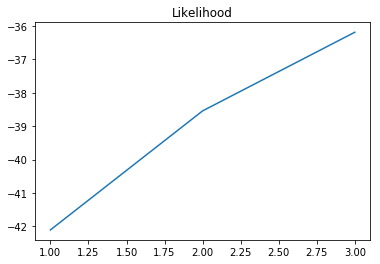

In [5]:
w = soft_em(data, 3, mean, 3)

[[array([8., 8.]), array([6., 6.]), array([7., 7.])], [array([1., 2.]), array([3., 3.]), array([2., 2.])], [array([-3., -3.]), array([-2., -4.]), array([-7., -7.])]]


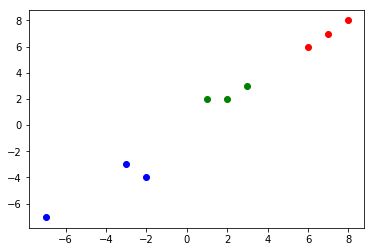

In [6]:
clusters = [[] for i in range(w.shape[1])]
for i, row in enumerate(w):
    clusters[np.argmax(row)].append(data[i])
print(clusters)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=["red", "green", "blue"][i])
plt.show()

## T3 & T4

Iteration:  0
w:  [[9.99999985e-01 1.52299795e-08]
 [1.00000000e+00 2.31952283e-16]
 [1.00000000e+00 3.77513454e-11]
 [1.00000000e+00 2.03109266e-42]
 [1.00000000e+00 5.38018616e-32]
 [1.00000000e+00 3.30570063e-37]
 [2.31952283e-16 1.00000000e+00]
 [2.31952283e-16 1.00000000e+00]
 [3.30570063e-37 1.00000000e+00]]
m:  [0.66666666 0.33333334]
mean:  [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
Cov:  [[[9.16666668 0.        ]
  [0.         8.66666669]]

 [[5.66666672 0.        ]
  [0.         5.66666677]]]


Iteration:  1
w:  [[9.94979696e-01 5.02030393e-03]
 [9.99922646e-01 7.73541258e-05]
 [9.98623856e-01 1.37614400e-03]
 [1.00000000e+00 6.27933891e-12]
 [9.99999994e-01 6.33185482e-09]
 [1.00000000e+00 2.12626993e-10]
 [2.77132409e-03 9.97228676e-01]
 [2.45908782e-03 9.97540912e-01]
 [1.30217751e-06 9.99998698e-01]]
m:  [0.66652866 0.33347134]
mean:  [[ 4.49739004  4.66243446]
 [-3.9912655  -4.65434481]]
Cov:  [[[6.94971903 0.        ]
  [0.         5.94046426]]

 [[4.7201191

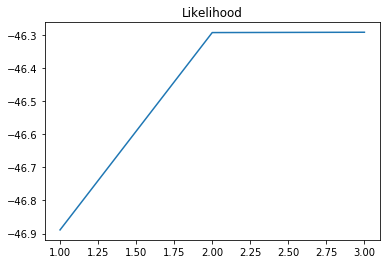

In [7]:
mean_x = np.array([3, -3])
mean_y = np.array([3, -3])
mean = np.array([mean_x, mean_y], dtype=np.float64).T
mean

w = soft_em(data, 2, mean, 3)

[[array([1., 2.]), array([3., 3.]), array([2., 2.]), array([8., 8.]), array([6., 6.]), array([7., 7.])], [array([-3., -3.]), array([-2., -4.]), array([-7., -7.])]]


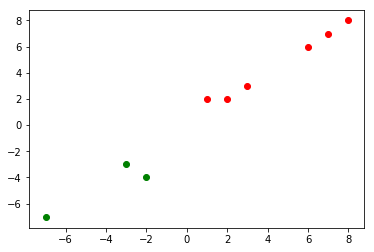

In [8]:
clusters = [[] for i in range(w.shape[1])]
for i, row in enumerate(w):
    clusters[np.argmax(row)].append(data[i])
print(clusters)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=["red", "green", "blue"][i])
plt.show()

# The face database

In [9]:
x = scipy.io.loadmat("facedata.mat")

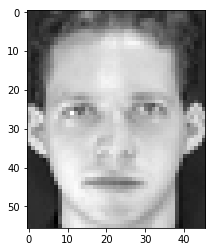

In [10]:
plt.imshow(x['facedata'][0, 0], cmap="gray")
plt.show()

In [11]:
xf = {}
for i in range(x['facedata'].shape[0]):
    for j in range(x['facedata'].shape[1]):
        xf[i, j] = img_as_float(x['facedata'][i, j])

In [12]:
def mat_to_vec(m):
    return m.reshape(1, -1)
def euclidean_dist(t, d):
    return np.sqrt(np.sum((t - d)**2))

In [13]:
euclidean_dist(mat_to_vec(xf[0, 0]), mat_to_vec(xf[0, 1]))

10.037616294165492

In [14]:
euclidean_dist(mat_to_vec(xf[0, 0]), mat_to_vec(xf[1, 0]))

8.173295099737281

## T6

In [15]:
def similar_mat(T, D):
    A = np.zeros((T.shape[0], D.shape[0]))
    for i, t in enumerate(T):
        for j, d in enumerate(D):
            A[i, j] = euclidean_dist(t, d)
    return A

In [16]:
T = []
D = []
for i in range(40):
    for j in range(3):
        T.append(xf[i, j])
    for j in range(3, 10):
        D.append(xf[i, j])
T = np.array(T)
D = np.array(D)

T_v = np.array([mat_to_vec(t)[0] for t in T])
D_v = np.array([mat_to_vec(d)[0] for d in D])

A = similar_mat(T_v, D_v)

In [17]:
T.shape

(120, 56, 46)

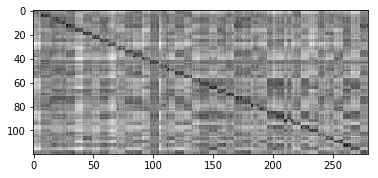

In [18]:
plt.imshow(A, cmap="gray")
plt.show()

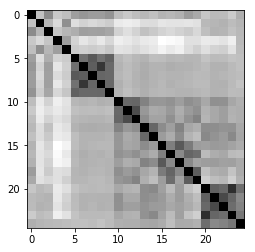

In [19]:
tmp_vec = []
for i in range(5):
    for j in range(5):
        tmp_vec.append(xf[i, j])
tmp_vec = np.array(tmp_vec)
A_tmp = similar_mat(tmp_vec, tmp_vec)

plt.imshow(A_tmp, cmap="gray")
plt.show()

## T7

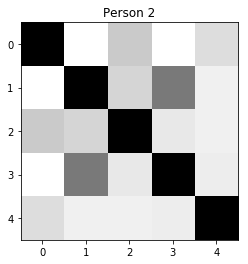

In [20]:
plt.imshow(A_tmp[5:10, 5:10], cmap="gray")
plt.title("Person 2")
plt.show()

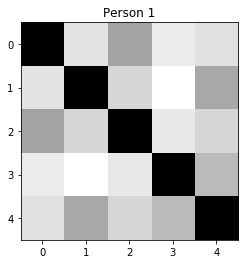

In [21]:
plt.imshow(A_tmp[:5, :5], cmap="gray")
plt.title("Person 1")
plt.show()

## T8

In [22]:
def report_predict(A, t):
    tp = fp = tn = fn = 0
    for j in range(A.shape[1]):
        for i in range(0, A.shape[0], 3):
            dist = np.min(A[i:i+3, j])
            j_person = j // 7
            i_person = i // 3
            predict = 1.0 if dist < t else 0.0
            if predict == 1.0 and i_person == j_person:
                tp += 1
            elif predict == 1.0 and i_person != j_person:
                fp += 1
            elif predict == 0.0 and i_person == j_person:
                fn += 1
            elif predict == 0.0 and i_person != j_person:
                tn += 1
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return np.array([tpr, fpr])

In [23]:
report_predict(A, 10)

array([0.99642857, 0.45641026])

## T9 & T10

In [24]:
def t9t10_roc(A, start, end, amount):
    t_range = np.linspace(start, end, amount)
    roc = np.array([report_predict(A, t) for t in tqdm_notebook(t_range)])
    # Show Result
    plt.plot(roc[:, 1], roc[:, 0])
    plt.title("RoC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    # Finding Recall at 0.1% false alarm rate
    idx = (np.abs(roc[:, 1] - 0.001)).argmin()
    recall = roc[idx]
    print("At 0.1% FPR, Recall is", recall)
    # Finding EER
    idx = np.abs(np.abs(roc[:, 1] - 1 + roc[:, 0])).argmin()
    eer = roc[idx]
    print(f"EER is at TPR = {eer[0]} and FPR = {eer[1]}")
    return roc

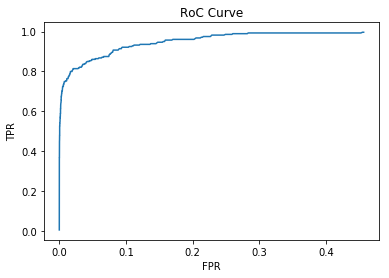

At 0.1% FPR, Recall is [0.54642857 0.00100733]
EER is at TPR = 0.9107142857142857 and FPR = 0.08901098901098901


In [25]:
roc_no_proj = t9t10_roc(A, 2, 10, 1000)

## T11

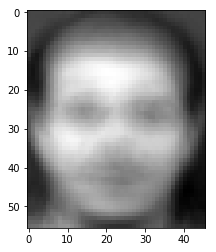

In [26]:
T_v_mean = T_v.mean(axis=0)

plt.imshow(T_v_mean.reshape(56, 46), cmap="gray")
plt.show()

In [27]:
X = T_v.T
X_caret = X - T_v_mean.reshape(-1, 1)
D_caret = D_v.T - T_v_mean.reshape(-1, 1)

## T12

In [28]:
print(f"Size of covariance matrix is {len(T_v_mean)} x {len(T_v_mean)}")
print(f"Rank is {LA.matrix_rank(np.cov(X_caret))}")

Size of covariance matrix is 2576 x 2576
Rank is 119


In [29]:
print(f"Gram matrix size is {X_caret.shape[1]} x {X_caret.shape[1]}")

Gram matrix size is 120 x 120


## T15

In [30]:
gram_mat = X_caret.T.dot(X_caret)
eigen_val, eigen_vec = np.linalg.eigh(gram_mat)

In [31]:
eigen_val[eigen_val > 1e-3].shape

(119,)

In [32]:
# Just a bubble sort
for i in range(eigen_val.shape[0] - 1):
    for j in range(eigen_val.shape[0] - 1 - i):
        if eigen_val[j] < eigen_val[j + 1]:
            eigen_val[j], eigen_val[j + 1] = eigen_val[j + 1], eigen_val[j]
            eigen_vec[:, j], eigen_vec[:, j + 1] = eigen_vec[:, j + 1].copy(), eigen_vec[:, j].copy()

## T16

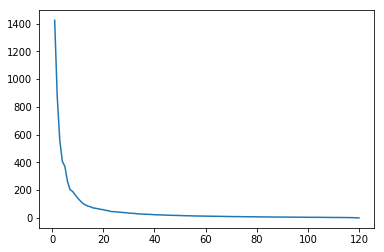

In [33]:
plt.plot(np.linspace(1, eigen_val.shape[0], eigen_val.shape[0]), eigen_val)
plt.show()

In [34]:
total_var = eigen_val.sum()
print("Total Variance = ", total_var)
for i, val in enumerate(np.cumsum(eigen_val)):
    if val >= 0.95 * total_var:
        eigen_amount = i + 1
        break
print(f"We should take {eigen_amount} eigenvector")

Total Variance =  6853.796339741124
We should take 64 eigenvector


In [35]:
eigen_val[0]

1423.9297148381538

In [36]:
eigen_vec[:, 0]

array([ 0.07820028,  0.15633363,  0.14076739,  0.05252672,  0.04456795,
        0.05947934,  0.00433108, -0.00255776,  0.01244094, -0.00516036,
        0.00058608,  0.01542051,  0.06282245,  0.06517672,  0.05535185,
       -0.05125934, -0.05261287, -0.04488465, -0.04346462, -0.04604713,
       -0.03374528,  0.00069813,  0.00106809,  0.02591401, -0.07070941,
       -0.05857396, -0.05789584, -0.13916408, -0.13042557, -0.12187151,
       -0.04518949, -0.0277502 , -0.00406905,  0.1192507 ,  0.07330844,
        0.08149413,  0.13175873,  0.13219306,  0.14226821,  0.10898309,
        0.10041008,  0.10620114,  0.01395625, -0.0220718 ,  0.00821777,
        0.03118031,  0.04287925,  0.06350818,  0.055345  ,  0.02281523,
       -0.01964227,  0.11240647,  0.10502066,  0.11515175,  0.12304385,
        0.13458668,  0.15827715, -0.13946718, -0.14658911, -0.12993531,
       -0.10389307, -0.11204893, -0.1217176 , -0.08503461, -0.06637081,
       -0.09016727, -0.06992988, -0.07120533, -0.10444925, -0.04

In [37]:
vp = X_caret.dot(eigen_vec)
for i in range(vp.shape[1]):
    vp[:, i] /= np.linalg.norm(vp[:, i])

## T17

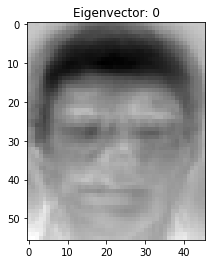

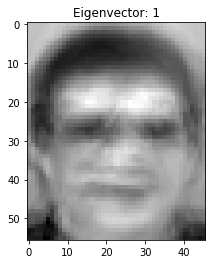

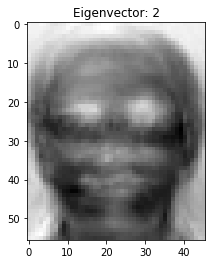

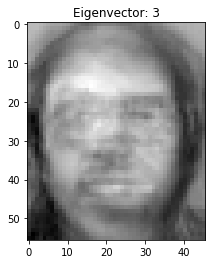

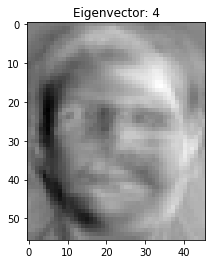

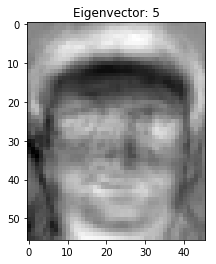

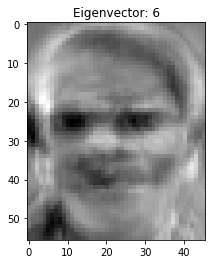

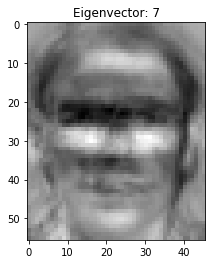

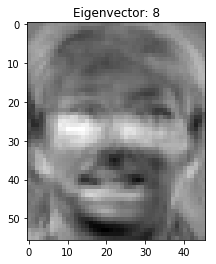

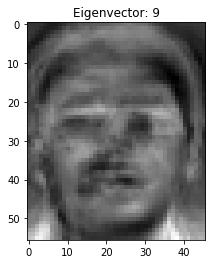

In [38]:
for i in range(10):
    plt.title(f"Eigenvector: {i}")
    plt.imshow(-vp[:, i].reshape(56, 46), cmap="gray")
    plt.show()

## T19 & T20

In [39]:
def proj_value(V, x_u, k):
    p = V.T.dot(x_u)
    p = p[:k, :]
    return p

def t19t20_work(k):
    T_p = proj_value(vp, X_caret, k)
    D_p = proj_value(vp, D_caret, k)
    A = similar_mat(T_p.T, D_p.T)
    return t9t10_roc(A, 0, 10, 1000)

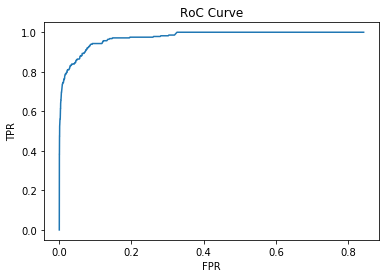

At 0.1% FPR, Recall is [0.51785714 0.00100733]
EER is at TPR = 0.9214285714285714 and FPR = 0.07857142857142857


In [40]:
roc_pca = t19t20_work(10)

## T20

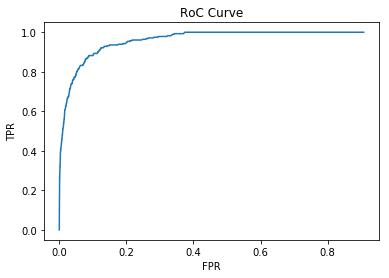

At 0.1% FPR, Recall is [0.25357143 0.00100733]
EER is at TPR = 0.8928571428571429 and FPR = 0.10686813186813186


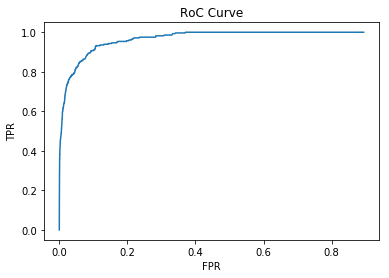

At 0.1% FPR, Recall is [0.34642857 0.00100733]
EER is at TPR = 0.9071428571428571 and FPR = 0.09395604395604396


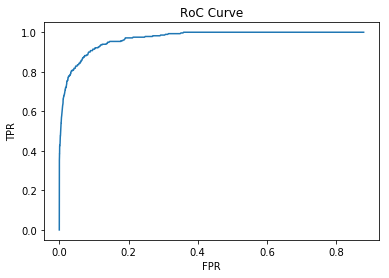

At 0.1% FPR, Recall is [0.41071429 0.00100733]
EER is at TPR = 0.9071428571428571 and FPR = 0.09294871794871795


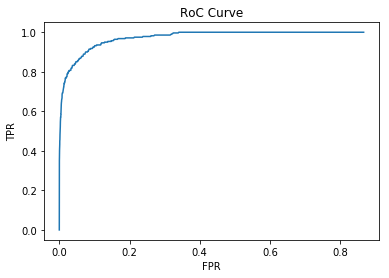

At 0.1% FPR, Recall is [0.40714286 0.0010989 ]
EER is at TPR = 0.9142857142857143 and FPR = 0.08562271062271062


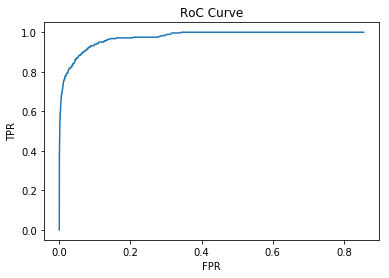

At 0.1% FPR, Recall is [0.45       0.00100733]
EER is at TPR = 0.9178571428571428 and FPR = 0.08113553113553114


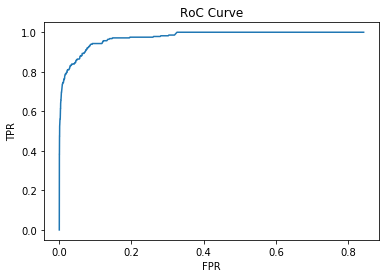

At 0.1% FPR, Recall is [0.51785714 0.00100733]
EER is at TPR = 0.9214285714285714 and FPR = 0.07857142857142857


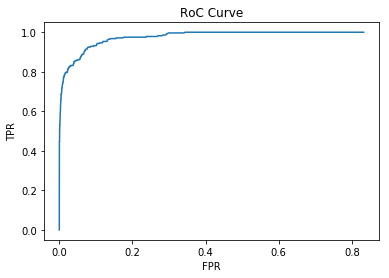

At 0.1% FPR, Recall is [0.50357143 0.00100733]
EER is at TPR = 0.9214285714285714 and FPR = 0.07765567765567766


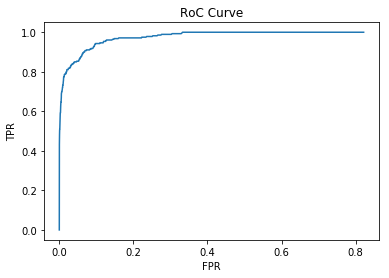

At 0.1% FPR, Recall is [0.51071429 0.00100733]
EER is at TPR = 0.9142857142857143 and FPR = 0.08525641025641026


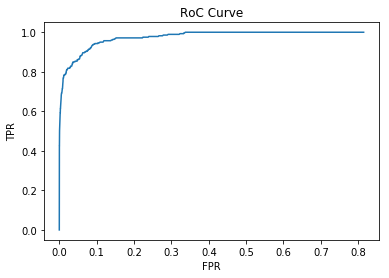

At 0.1% FPR, Recall is [0.51785714 0.00100733]
EER is at TPR = 0.9178571428571428 and FPR = 0.08250915750915751


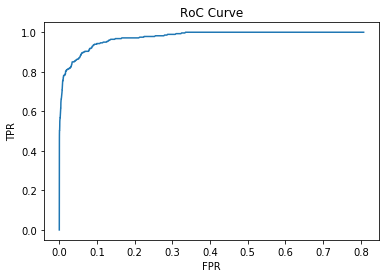

At 0.1% FPR, Recall is [0.50714286 0.00100733]
EER is at TPR = 0.9178571428571428 and FPR = 0.08186813186813187


In [41]:
for k in range(5, 15):
    t19t20_work(k)

## OT1

In [42]:
def MSE(x, xp):
    x /= LA.norm(x)
    xp /= LA.norm(xp)
    diff = x - xp
    return (diff * diff).mean()
def reconstruct(mean, V, x, k):
    return V[:, :k].dot(x.reshape(-1, 1)) + mean.reshape(-1, 1)

MSE: 0.005612765405463089


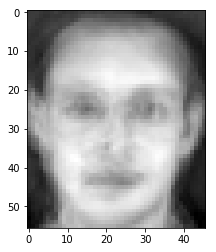

In [43]:
T_p = proj_value(vp, X_caret, 10)
print("MSE:", MSE(T_v[:, 0], reconstruct(T_v_mean, vp, T_p[:, 0], 10)))
plt.imshow(reconstruct(T_v_mean, vp, T_p[:, 0], 10).reshape(56, 46), cmap="gray")
plt.show()

## OT2

k = 1
MSE: 0.9624124764720777


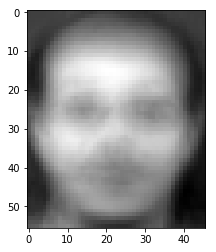

k = 2
MSE: 0.497692669092087


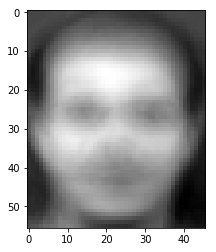

k = 3
MSE: 0.3236022527189521


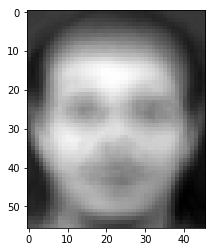

k = 4
MSE: 0.2428010369663189


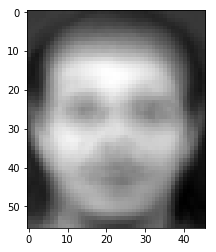

k = 5
MSE: 0.1939987255200806


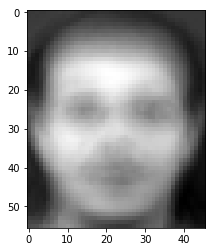

k = 6
MSE: 0.1633529132871778


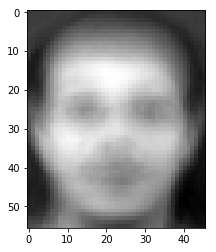

k = 7
MSE: 0.13912854788388607


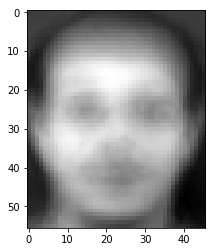

k = 8
MSE: 0.12285198643039599


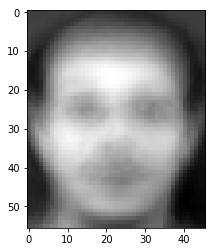

k = 9
MSE: 0.10797590953294545


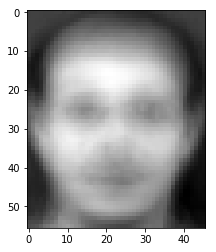

k = 10
MSE: 0.0977086638429279


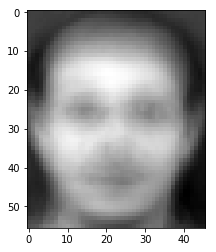

k = 119
MSE: 0.008578460441305284


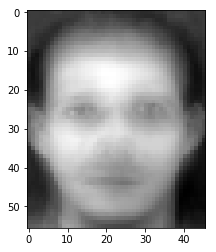

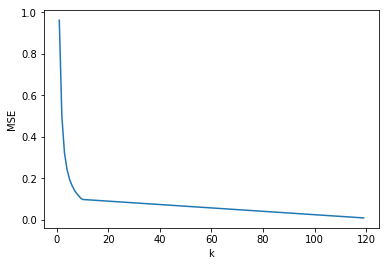

In [44]:
MSES = []
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 119]:
    print("k =", k)
    T_p = proj_value(vp, X_caret, k)
    print("MSE:", MSE(T_p[:, 0], reconstruct(T_v_mean, vp, T_p[:, 0], k)))
    MSES.append(MSE(T_p[:, 0], reconstruct(T_v_mean, vp, T_p[:, 0], k)))
    plt.imshow(reconstruct(T_v_mean, vp, T_p[:, 0], k).reshape(56, 46), cmap="gray")
    plt.show()
plt.xlabel("k")
plt.ylabel("MSE")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 119], MSES)

## T21

In [46]:
def cal_sw(T_p):
    sw = np.zeros((T_p.shape[0], T_p.shape[0]))
    for i in range(0, 120, 3):
        mean = T_p[:, i:i+3].mean(axis=1)
        for j in range(3):
            x_m_mean = T_p[:, i+j] - mean
            x_m_mean = x_m_mean.reshape(-1, 1)
            sw = sw + x_m_mean.dot(x_m_mean.T)
    return sw
def cal_sb(T_p):
    sb = np.zeros((T_p.shape[0], T_p.shape[0]))
    mean = T_p.mean(axis=1)
    # print("G: ", mean)
    for i in range(0, 120, 3):
        mean_i = T_p[:, i:i+3].mean(axis=1).reshape(-1, 1)
        # print(f"{i}: {mean_i}")
        diff = mean_i - mean
        sb = sb + diff.dot(diff.T)
    return sb

In [47]:
for i in range(1, 120):
    T_p = proj_value(vp, X_caret, i)
    sw = cal_sw(T_p)
    print(f"At k = {i}, rank of Sw is {np.linalg.matrix_rank(sw)}.")

At k = 1, rank of Sw is 1.
At k = 2, rank of Sw is 2.
At k = 3, rank of Sw is 3.
At k = 4, rank of Sw is 4.
At k = 5, rank of Sw is 5.
At k = 6, rank of Sw is 6.
At k = 7, rank of Sw is 7.
At k = 8, rank of Sw is 8.
At k = 9, rank of Sw is 9.
At k = 10, rank of Sw is 10.
At k = 11, rank of Sw is 11.
At k = 12, rank of Sw is 12.
At k = 13, rank of Sw is 13.
At k = 14, rank of Sw is 14.
At k = 15, rank of Sw is 15.
At k = 16, rank of Sw is 16.
At k = 17, rank of Sw is 17.
At k = 18, rank of Sw is 18.
At k = 19, rank of Sw is 19.
At k = 20, rank of Sw is 20.
At k = 21, rank of Sw is 21.
At k = 22, rank of Sw is 22.
At k = 23, rank of Sw is 23.
At k = 24, rank of Sw is 24.
At k = 25, rank of Sw is 25.
At k = 26, rank of Sw is 26.
At k = 27, rank of Sw is 27.
At k = 28, rank of Sw is 28.
At k = 29, rank of Sw is 29.
At k = 30, rank of Sw is 30.
At k = 31, rank of Sw is 31.
At k = 32, rank of Sw is 32.
At k = 33, rank of Sw is 33.
At k = 34, rank of Sw is 34.
At k = 35, rank of Sw is 35.
At 

## T22

In [48]:
T_p = proj_value(vp, X_caret, 80)
sw = cal_sw(T_p)
sb = cal_sb(T_p)

In [49]:
T_p[0, 119]

1.6585942980166115

In [50]:
lda_proj = LA.inv(sw).dot(sb)
lda_proj

array([[ 3.33710229e+08,  4.57344626e+07, -3.35286670e+07, ...,
         8.50440032e+05, -1.17059413e+06, -7.38875165e+05],
       [ 7.43939994e+07,  1.02189631e+07, -7.48001164e+06, ...,
         1.89629421e+05, -2.60926701e+05, -1.64753886e+05],
       [-8.54643393e+07, -1.17213221e+07,  8.62978382e+06, ...,
        -2.17816710e+05,  2.99891799e+05,  1.89287998e+05],
       ...,
       [ 1.47254951e+08,  2.01854114e+07, -1.47961510e+07, ...,
         3.75737809e+05, -5.16301136e+05, -3.26101294e+05],
       [-2.08565743e+08, -2.85799085e+07,  2.09619931e+07, ...,
        -5.31267813e+05,  7.32268330e+05,  4.61650033e+05],
       [-1.33650444e+08, -1.83206417e+07,  1.34324046e+07, ...,
        -3.40663535e+05,  4.68679085e+05,  2.96365763e+05]])

In [51]:
print("Is Sw-1SB symmetric: ", all((lda_proj == lda_proj.T).reshape(-1)))

Is Sw-1SB symmetric:  False


In [52]:
eigen_val, eigen_vec = LA.eig(lda_proj)
eigen_val = np.real(eigen_val)
eigen_vec = np.real(eigen_vec)
eigen_val[eigen_val < 1e-7] = 0
print(f"We have {eigen_val[eigen_val != 0].shape[0]} non-zero eigenvalues")

We have 39 non-zero eigenvalues


In [53]:
# Lazy to write sort function
idx = eigen_val.argsort()[::-1]   
eigen_val = eigen_val[idx]
eigen_vec = eigen_vec[:, idx]

In [54]:
eigen_val

array([1.09533995e+09, 3.94878248e+05, 1.15507694e+05, 5.98549882e+04,
       4.59575257e+04, 3.09746952e+04, 1.98441331e+04, 1.37525473e+04,
       1.01268049e+04, 8.52859931e+03, 6.13670691e+03, 5.78190894e+03,
       3.03142180e+03, 2.61312403e+03, 2.54665004e+03, 1.99433495e+03,
       1.86138864e+03, 1.38066515e+03, 1.14445310e+03, 1.00037068e+03,
       8.56506826e+02, 7.60017716e+02, 6.42168016e+02, 5.25753980e+02,
       4.51209259e+02, 3.83381793e+02, 3.58034929e+02, 3.27283088e+02,
       2.84735104e+02, 2.03013300e+02, 1.78182174e+02, 1.49628163e+02,
       1.29253377e+02, 1.20149104e+02, 8.69066079e+01, 6.34878845e+01,
       5.69820245e+01, 4.00969967e+01, 2.80081101e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [55]:
print("LDA Projection: ", eigen_vec)

LDA Projection:  [[-0.10828308  0.06606924  0.0125589  ... -0.00044443 -0.00089938
  -0.00066271]
 [-0.02414123  0.03656763  0.04297539 ...  0.00465347 -0.00080825
  -0.00334513]
 [ 0.02773866  0.02213914 -0.14831407 ...  0.0017824  -0.00075966
  -0.00999689]
 ...
 [-0.04779589 -0.03082369 -0.0077499  ...  0.14265482 -0.0513144
   0.08517388]
 [ 0.06768062 -0.03555337  0.00546541 ... -0.05721149 -0.0078576
   0.02999825]
 [ 0.04337033 -0.02517364 -0.02425101 ...  0.09864855  0.04909837
   0.03152157]]


## T23

In [56]:
vp.shape

(2576, 120)

In [57]:
for i in range(39):
    eigen_vec[:, i] /= LA.norm(eigen_vec[:, i])

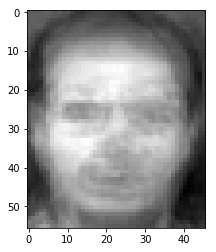

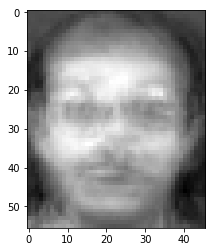

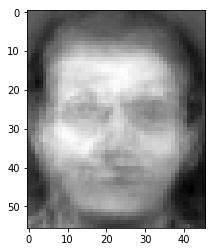

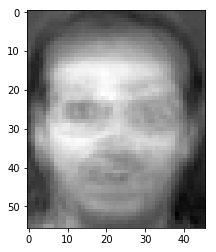

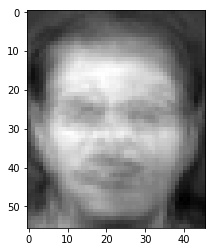

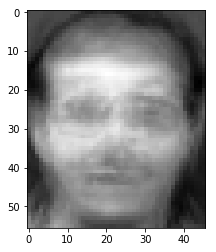

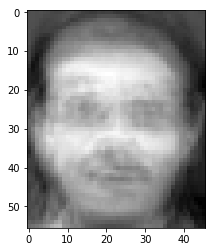

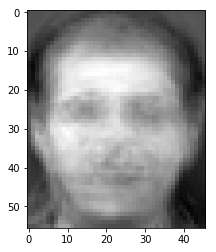

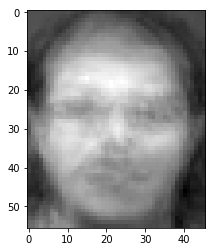

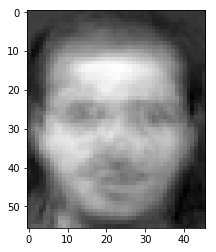

In [58]:
for i in range(10):
    vec = (vp[:, :80].dot(eigen_vec) + T_v_mean.reshape(-1, 1))[:, i]
    plt.imshow(vec.reshape(56, 46), cmap="gray")
    plt.show()

## T24

In [59]:
T_lda = eigen_vec.T.dot(T_p)[:39]
D_p = proj_value(vp, D_caret, 80)
D_lda = eigen_vec.T.dot(D_p)[:39]

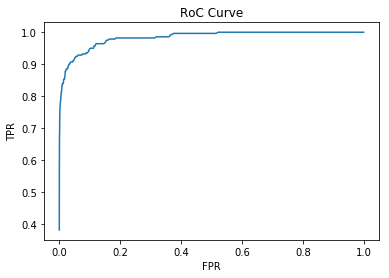

At 0.1% FPR, Recall is [0.68214286 0.00100733]
EER is at TPR = 0.9285714285714286 and FPR = 0.07133699633699633


In [60]:
A = similar_mat(T_lda.T, D_lda.T)
roc_fisher = t9t10_roc(A, 2, 10, 1000)

## T25

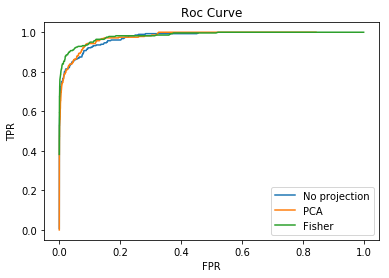

In [61]:
plt.plot(roc_no_proj[:, 1], roc_no_proj[:, 0], label="No projection")
plt.plot(roc_pca[:, 1], roc_pca[:, 0], label="PCA")
plt.plot(roc_fisher[:, 1], roc_fisher[:, 0], label="Fisher")
plt.title("Roc Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()